## Tutorial on the pullback operation with collision avoidance spec

---

In [1]:
import casadi as ca
import numpy as np
from fabrics.diffGeometry.spec import Spec

#### 1. Simple collision avoidance spec

We will create a simple spec that describes collision avoidance behavior.\
$\mathbf{x}$ here is the distance to the obstacle, and the spec is defined on the task space $\mathcal{X}$.

Spec $(\mathbf{M}, \mathbf{f})_\mathcal{X}$:

\begin{align}
\mathbf{M}\ddot{\mathbf{x}} + \mathbf{f} = \mathbf{0} \\
with: \\
\mathbf{M} &= \begin{pmatrix} 1 \end{pmatrix} \\
\mathbf{f} &= \begin{pmatrix} \frac{-3}{\mathbf{x}} \dot{\mathbf{x}}^2 \end{pmatrix} \\
\end{align}


In [2]:
# Using the built in __add__ function
x_o1 = ca.SX.sym('x_o1', 1)
xdot_o1 = ca.SX.sym('xdot_o1', 1)
M1 = ca.SX([[1.0]])
f1 = ca.vcat([-3.0/x_o1[0] * 0.1 * xdot_o1**2])
simple_spec1 = Spec(M1, f=f1, x=x_o1, xdot=xdot_o1)
simple_spec1.concretize()

x_o2 = ca.SX.sym('x_o2', 1)
xdot_o2 = ca.SX.sym('xdot_o2', 1)
M2 = ca.SX([[1.0]])
f2 = ca.vcat([-3.0/x_o2[0] * 0.1 * xdot_o2**2])
simple_spec2 = Spec(M2, f=f2, x=x_o2, xdot=xdot_o2)
simple_spec2.concretize()

x_o3 = ca.SX.sym('x_o3', 1)
xdot_o3 = ca.SX.sym('xdot_o3', 1)
M3 = ca.SX([[1.0]])
f3 = ca.vcat([-3.0/x_o3[0] * 0.1 * xdot_o3**2])
simple_spec3 = Spec(M3, f=f3, x=x_o3, xdot=xdot_o3)
simple_spec3.concretize()

x_o4 = ca.SX.sym('x_o4', 1)
xdot_o4 = ca.SX.sym('xdot_o4', 1)
M4 = ca.SX([[1.0]])
f4 = ca.vcat([-3.0/x_o4[0] * 0.1 * xdot_o4**2])
simple_spec4 = Spec(M4, f=f4, x=x_o4, xdot=xdot_o4)
simple_spec4.concretize()

x_o5 = ca.SX.sym('x_o5', 1)
xdot_o5 = ca.SX.sym('xdot_o5', 1)
M5 = ca.SX([[1.0]])
f5 = ca.vcat([-3.0/x_o5[0] * 0.1 * xdot_o5**2])
simple_spec5 = Spec(M5, f=f5, x=x_o5, xdot=xdot_o5)
simple_spec5.concretize()

x_o6 = ca.SX.sym('x_o6', 1)
xdot_o6 = ca.SX.sym('xdot_o6', 1)
M6 = ca.SX([[1.0]])
f6 = ca.vcat([-3.0/x_o6[0] * 0.1 * xdot_o6**2])
simple_spec6 = Spec(M6, f=f6, x=x_o6, xdot=xdot_o6)
simple_spec6.concretize()

x_o7 = ca.SX.sym('x_o7', 1)
xdot_o7 = ca.SX.sym('xdot_o7', 1)
M7 = ca.SX([[1.0]])
f7 = ca.vcat([-3.0/x_o7[0] * 0.1 * xdot_o7**2])
simple_spec7 = Spec(M7, f=f7, x=x_o7, xdot=xdot_o7)
simple_spec7.concretize()

x_o8 = ca.SX.sym('x_o8', 1)
xdot_o8 = ca.SX.sym('xdot_o8', 1)
M8 = ca.SX([[1.0]])
f8 = ca.vcat([-3.0/x_o8[0] * 0.1 * xdot_o8**2])
simple_spec8 = Spec(M8, f=f8, x=x_o8, xdot=xdot_o8)
simple_spec8.concretize()

x_o9 = ca.SX.sym('x_o9', 1)
xdot_o9 = ca.SX.sym('xdot_o9', 1)
M9 = ca.SX([[1.0]])
f9 = ca.vcat([-3.0/x_o9[0] * 0.1 * xdot_o9**2])
simple_spec9 = Spec(M9, f=f9, x=x_o9, xdot=xdot_o9)
simple_spec9.concretize()

x_o10 = ca.SX.sym('x_o10', 1)
xdot_o10 = ca.SX.sym('xdot_o10', 1)
M10 = ca.SX([[1.0]])
f10 = ca.vcat([-3.0/x_o10[0] * 0.1 * xdot_o10**2])
simple_spec10 = Spec(M10, f=f10, x=x_o10, xdot=xdot_o10)
simple_spec10.concretize()

print(f"M: {simple_spec1.M()}")
print(f"f: {simple_spec1.f()}")
print(f"h: {simple_spec1.h()}")

M: 1
f: ((0.1*(-3/x_o1))*sq(xdot_o1))
h: (0.999999*((0.1*(-3/x_o1))*sq(xdot_o1)))


#### 2. Obstacle

Let us first define an sphere obstacle with the following position and radius:

\begin{align}
\mathbf{q}_{obs} &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
r_{obs} &= 0.5
\end{align}


In [3]:
n_points = 10

radius = 0.4

angles = np.linspace(0, 2*np.pi, n_points, endpoint=False)

x = 1.0 + radius * np.cos(angles)
y = radius * np.sin(angles)

positions = np.column_stack((x, y))

In [4]:
from mpscenes.obstacles.sphere_obstacle import SphereObstacle

circle_dict1 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[0].tolist(),
        'radius': 0.2,
    }
}
obstacle1 = SphereObstacle(name="CircleObstacle1", content_dict = circle_dict1)

circle_dict2 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[1].tolist(),
        'radius': 0.2,
    }
}
obstacle2 = SphereObstacle(name="CircleObstacle2", content_dict = circle_dict2)

circle_dict3 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[2].tolist(),
        'radius': 0.2,
    }
}
obstacle3 = SphereObstacle(name="CircleObstacle3", content_dict = circle_dict3)

circle_dict4 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[3].tolist(),
        'radius': 0.2,
    }
}
obstacle4 = SphereObstacle(name="CircleObstacle4", content_dict = circle_dict4)

circle_dict5 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[4].tolist(),
        'radius': 0.2,
    }
}
obstacle5 = SphereObstacle(name="CircleObstacle5", content_dict = circle_dict5)

circle_dict6 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[5].tolist(),
        'radius': 0.2,
    }
}
obstacle6 = SphereObstacle(name="CircleObstacle6", content_dict = circle_dict6)

circle_dict7 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[6].tolist(),
        'radius': 0.2,
    }
}
obstacle7 = SphereObstacle(name="CircleObstacle7", content_dict = circle_dict7)

circle_dict8 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[7].tolist(),
        'radius': 0.2,
    }
}
obstacle8 = SphereObstacle(name="CircleObstacle8", content_dict = circle_dict8)

circle_dict9 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[8].tolist(),
        'radius': 0.2,
    }
}
obstacle9 = SphereObstacle(name="CircleObstacle9", content_dict = circle_dict9)

circle_dict10 = {
    'type': 'SphereObstacle',
    'geometry': {
        'position': positions[9].tolist(),
        'radius': 0.2,
    }
}
obstacle10 = SphereObstacle(name="CircleObstacle10", content_dict = circle_dict10)

#### 3. Differential map obstacle

Now we need to create a differential map $\phi: \mathcal{Q} \rightarrow \mathcal{X}$ between distance task space $\mathcal{X}$ and robot configuration space $\mathcal{Q}$.

\begin{align}
\phi(\mathbf{q}) = \frac{||\mathbf{q} - \mathbf{q}_{obs}||_2}{r_{obs}} - 1
\end{align}


In [5]:
from fabrics.diffGeometry.diffMap import DifferentialMap
from fabrics.helpers.variables import Variables
x = ca.SX.sym('x', 2)
xdot = ca.SX.sym('xdot', 2)
variables = Variables(state_variables={'x': x, 'xdot': xdot})

phi1 = ca.norm_2(x - obstacle1.position())/obstacle1.radius() - 1
diff_map1 = DifferentialMap(phi1, variables)

phi2 = ca.norm_2(x - obstacle2.position())/obstacle2.radius() - 1
diff_map2 = DifferentialMap(phi2, variables)

phi3 = ca.norm_2(x - obstacle3.position())/obstacle3.radius() - 1
diff_map3 = DifferentialMap(phi3, variables)

phi4 = ca.norm_2(x - obstacle4.position())/obstacle4.radius() - 1
diff_map4 = DifferentialMap(phi4, variables)

phi5 = ca.norm_2(x - obstacle5.position())/obstacle5.radius() - 1
diff_map5 = DifferentialMap(phi5, variables)

phi6 = ca.norm_2(x - obstacle6.position())/obstacle6.radius() - 1
diff_map6 = DifferentialMap(phi6, variables)

phi7 = ca.norm_2(x - obstacle7.position())/obstacle7.radius() - 1
diff_map7 = DifferentialMap(phi7, variables)

phi8 = ca.norm_2(x - obstacle8.position())/obstacle8.radius() - 1
diff_map8 = DifferentialMap(phi8, variables)

phi9 = ca.norm_2(x - obstacle9.position())/obstacle9.radius() - 1
diff_map9 = DifferentialMap(phi9, variables)

phi10 = ca.norm_2(x - obstacle10.position())/obstacle10.radius() - 1
diff_map10 = DifferentialMap(phi10, variables)

#### 4. Pullback operation

Using the differential map $\phi$, the spec can be pulled to the configuration space as $(\mathbf{M}, \mathbf{f})_\mathcal{Q}$ from the task space as $(\mathbf{M}, \mathbf{f})_\mathcal{X}$ using the pullback operation:

\begin{align}
(\mathbf{M}, \mathbf{f})_\mathcal{Q} = pull_{\phi} (\mathbf{M}, \mathbf{f})_\mathcal{X} = \left(\mathbf{J}^T\mathbf{M}\mathbf{J}, \mathbf{J}^T(\mathbf{f} + \mathbf{M}\mathbf{\dot{J}}\mathbf{\dot{q}})\right)
\end{align}

The pullback operation is derived using the differential map's Jacobian $\mathbf{J} = \partial_{\mathbf{q}}\phi $ and $\ddot{\mathbf{x}} = \mathbf{J}\mathbf{\ddot{q}} + \mathbf{\dot{J}}\mathbf{\dot{q}}$ as follows:
\begin{align}
pull_{\phi} (\mathbf{M}, \mathbf{f})_\mathcal{X} = \mathbf{J}^T(\mathbf{M}\ddot{\mathbf{x}} + \mathbf{f}) &= \mathbf{J}^T\left(\mathbf{M}(\mathbf{J}\mathbf{\ddot{q}} + \mathbf{\dot{J}}\mathbf{\dot{q}}) + \mathbf{f}\right) \\
&= (\mathbf{J}^T\mathbf{M}\mathbf{J})\mathbf{\ddot{q}} + \mathbf{J}^T(\mathbf{f} + \mathbf{M}\mathbf{\dot{J}}\mathbf{\dot{q}})
\end{align}

In the next cell, the simple collision avoidance spec is pulled back to the configuration space and rewriten in the motion policy form with concretize.

In [6]:
simple_spec1 = simple_spec1.pull(diff_map1)
simple_spec2 = simple_spec2.pull(diff_map2)
simple_spec3 = simple_spec3.pull(diff_map3)
simple_spec4 = simple_spec4.pull(diff_map4)
simple_spec5 = simple_spec5.pull(diff_map5)
simple_spec6 = simple_spec6.pull(diff_map6)
simple_spec7 = simple_spec7.pull(diff_map7)
simple_spec8 = simple_spec8.pull(diff_map8)
simple_spec9 = simple_spec9.pull(diff_map9)
simple_spec10 = simple_spec10.pull(diff_map10)

simple_spec1 = simple_spec1.__add__(simple_spec2)
simple_spec1 = simple_spec1.__add__(simple_spec3)
simple_spec1 = simple_spec1.__add__(simple_spec4)
simple_spec1 = simple_spec1.__add__(simple_spec5)
simple_spec1 = simple_spec1.__add__(simple_spec6)
simple_spec1 = simple_spec1.__add__(simple_spec7)
simple_spec1 = simple_spec1.__add__(simple_spec8)
simple_spec1 = simple_spec1.__add__(simple_spec9)
simple_spec1 = simple_spec1.__add__(simple_spec10)
simple_spec1.concretize()


print(f"M: {simple_spec1.M()}")
print(f"f: {simple_spec1.f()}")
print(f"h: {simple_spec1.h()}")

M: @1=5, @2=(x_0-1.4), @3=sqrt((sq(@2)+sq(x_1))), @4=(@1*(@2/@3)), @5=1.32361, @6=(x_0-@5), @7=(x_1-0.235114), @8=sqrt((sq(@6)+sq(@7))), @9=(@1*(@6/@8)), @10=(x_0-1.12361), @11=(x_1-0.380423), @12=sqrt((sq(@10)+sq(@11))), @13=(@1*(@10/@12)), @14=(x_0-0.876393), @15=(x_1-0.380423), @16=sqrt((sq(@14)+sq(@15))), @17=(@1*(@14/@16)), @18=0.676393, @19=(x_0-@18), @20=(x_1-0.235114), @21=sqrt((sq(@19)+sq(@20))), @22=(@1*(@19/@21)), @23=(x_0-0.6), @24=(x_1-4.89859e-17), @25=sqrt((sq(@23)+sq(@24))), @26=(@1*(@23/@25)), @27=(x_0-@18), @28=(x_1--0.235114), @29=sqrt((sq(@27)+sq(@28))), @30=(@1*(@27/@29)), @31=(x_0-0.876393), @32=(x_1--0.380423), @33=sqrt((sq(@31)+sq(@32))), @34=(@1*(@31/@33)), @35=(x_0-1.12361), @36=(x_1--0.380423), @37=sqrt((sq(@35)+sq(@36))), @38=(@1*(@35/@37)), @39=(x_0-@5), @40=(x_1--0.235114), @41=sqrt((sq(@39)+sq(@40))), @42=(@1*(@39/@41)), @43=(@1*(x_1/@3)), @44=(@1*(@7/@8)), @45=(@1*(@11/@12)), @46=(@1*(@15/@16)), @47=(@1*(@20/@21)), @48=(@1*(@24/@25)), @49=(@1*(@28/@29)),

### Planar simulation of simple collision avoidance spec

Test the spec inside a planar simulation environment.\
The spec produces a trajectory which will be visualized by the environment.

In [7]:
import gym
import numpy as np
import planarenvs.point_robot
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### 1. Run the simulation to create the first trajectory

In [8]:
# 10 obstacles spec
env = gym.make("point-robot-acc-v0", render=False, dt=0.01)
init_pos = np.array([-1.0, 0.2])
init_vel = np.array([1.1, 0.0])
ob = env.reset(pos=init_pos, vel=init_vel)
env.add_obstacle(obstacle1)
env.add_obstacle(obstacle2)
env.add_obstacle(obstacle3)
env.add_obstacle(obstacle4)
env.add_obstacle(obstacle5)
env.add_obstacle(obstacle6)
env.add_obstacle(obstacle7)
env.add_obstacle(obstacle8)
env.add_obstacle(obstacle9)
env.add_obstacle(obstacle10)
n_steps = 1000
positions_10 = np.zeros((n_steps, 2))
actions_10 = np.zeros((n_steps, 2))
for i in range(n_steps):
    x = ob['joint_state']['position']
    positions_10[i] = x
    xdot = ob['joint_state']['velocity']
    M, h, action = simple_spec1.evaluate(x=x, xdot=xdot)
    actions_10[i] = action
    ob, _, _, _ = env.step(action)
env.close()

#### 2. Visualize the trajectories

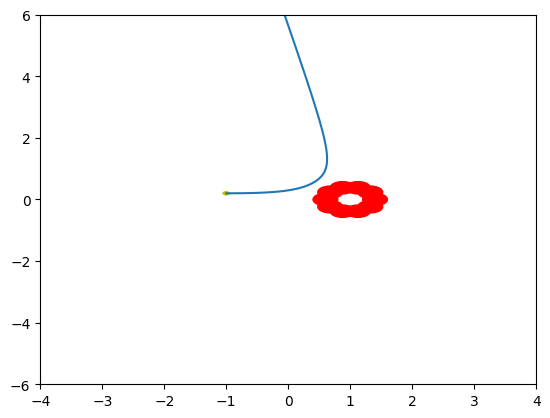

In [9]:
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(1, 1)
#for m, subplot in np.ndenumerate(axs):
#    subplot.set_xlim(-4, 4)
#    subplot.set_ylim(-6, 6)

# Baseline + 10 obstacles spec
fig, axs = plt.subplots(1, 1)
axs.plot(positions_10[:,0], positions_10[:,1])
#axs.axis('equal')
axs.set_xlim(-4,4)
axs.set_ylim(-6,6)
initial_location = plt.Circle((positions_10[:,0][0], positions_10[:,1][0]), radius=0.05, color='y')

obst1 = plt.Circle(obstacle1.position(), radius=obstacle1.radius(), color='r')
axs.add_patch(obst1)
obst2 = plt.Circle(obstacle2.position(), radius=obstacle2.radius(), color='r')
axs.add_patch(obst2)
obst3 = plt.Circle(obstacle3.position(), radius=obstacle3.radius(), color='r')
axs.add_patch(obst3)
obst4 = plt.Circle(obstacle4.position(), radius=obstacle4.radius(), color='r')
axs.add_patch(obst4)
obst5 = plt.Circle(obstacle5.position(), radius=obstacle5.radius(), color='r')
axs.add_patch(obst5)
obst6 = plt.Circle(obstacle6.position(), radius=obstacle6.radius(), color='r')
axs.add_patch(obst6)
obst7 = plt.Circle(obstacle7.position(), radius=obstacle7.radius(), color='r')
axs.add_patch(obst7)
obst8 = plt.Circle(obstacle8.position(), radius=obstacle8.radius(), color='r')
axs.add_patch(obst8)
obst9 = plt.Circle(obstacle9.position(), radius=obstacle9.radius(), color='r')
axs.add_patch(obst9)
obst10 = plt.Circle(obstacle10.position(), radius=obstacle10.radius(), color='r')
axs.add_patch(obst10)

axs.add_patch(initial_location)
plt.show()

#x_1_obs_last = np.array((positions_1[:,0][-1], positions_1[:,1][-1]))
x_10_obs_last = np.array((positions_10[:,0][-1], positions_10[:,1][-1]))

In [10]:
print(f"Last position 10 obstacles : {x_10_obs_last}")
print("--------------------------------------------------------")
print(f"Last action 10 obstacles   : {actions_10[-1]}")
print("--------------------------------------------------------")
print(f"Action 10, 10 obstacles   : {actions_10[10]}")
print("--------------------------------------------------------")
print(f"Average action 10 obstacles : {np.average((actions_10), axis=0)}")
print("--------------------------------------------------------")
print(np.mean(actions_10))

Last position 10 obstacles : [-1.25814378 12.90524194]
--------------------------------------------------------
Last action 10 obstacles   : [-0.01651256  0.09282222]
--------------------------------------------------------
Action 10, 10 obstacles   : [-0.2142092  0.116314 ]
--------------------------------------------------------
Average action 10 obstacles : [-0.14457252  0.19830385]
--------------------------------------------------------
0.026865665746930247
